## CSI-777 Homework 2

### Jericho McLeod

#### Import the data

In [4]:
import csv
import matplotlib.pyplot as plt

data = []
with open('hw1.csv') as csvfile:
    csv_r = csv.reader(csvfile,delimiter=',')
    for row in csv_r:
        data.append(row)

#### Show the data

In [5]:
data[0][0]='outlook'
for i in data:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))
    

   outlook temperature   humidity      windy       play
     sunny         85         85      FALSE         no
     sunny         80         90       TRUE         no
  overcast         83         86          0        yes
     rainy         70         96      FALSE           
     rainy         68         80      FALSE        yes
     rainz         65         70       TRUE         no
  overcast                    65       TRUE        yes
     sunny         72         95      FALSE         no
     sunny        -40         70      FALSE        yes
     rainy         75         80      FALSE        yes
     sunny         75         70       TRUE        yes
  overcast         72         90       TRUE        yes
  overcast         81         75      FALSE        yes
     rainy         71         91       TRUE         no


#### Examine the Humidity data a bit more:

Mean humidity: 81.642857
Standard Deviation: 10.285218


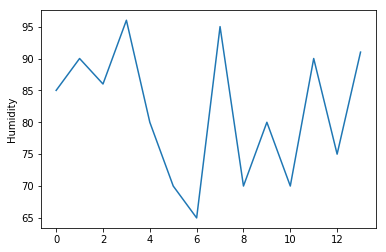

In [6]:
humidity = []
for i in data:
    try:
        humidity.append(int(i[2]))
    except:
        pass

humidity_mean = 0
for i in humidity:
    humidity_mean+=i
humidity_mean/=len(humidity)
print("Mean humidity: %f"%(humidity_mean))
ss = 0
for i in humidity:
    var = i-humidity_mean
    var_sq = var**2
    ss+=var_sq
st_dev = ((1/(len(humidity)-1))*ss)**0.5
print("Standard Deviation: %f"%(st_dev))


plt.plot(humidity)
plt.ylabel('Humidity')
plt.show()

#### Look at the split on 1 Standard Deviation:

In [7]:
high = []
mid  = []
low  = []
standard_dev_output = []

for i in range(len(data)):
    if i==0:
        high.append(data[i])
        mid.append(data[i])
        low.append(data[i])
        standard_dev_output.append(data[i])
    else:
        if int(data[i][2])>humidity_mean+st_dev:
            high.append(data[i])
        elif int(data[i][2])<=humidity_mean+st_dev and int(data[i][2])>humidity_mean-st_dev:
            mid.append(data[i])
            standard_dev_output.append(data[i])
        elif int(data[i][2]) <= humidity_mean-st_dev:
            low.append(data[i])
            standard_dev_output.append(data[i])

print("\nHigh Humidity Instances:")
for i in high:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))

print("\nMid Humidity Instances:")
for i in mid:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))

print("\nLow Humidity Instances:")
for i in low:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))


High Humidity Instances:
   outlook temperature   humidity      windy       play
     rainy         70         96      FALSE           
     sunny         72         95      FALSE         no

Mid Humidity Instances:
   outlook temperature   humidity      windy       play
     sunny         85         85      FALSE         no
     sunny         80         90       TRUE         no
  overcast         83         86          0        yes
     rainy         68         80      FALSE        yes
     rainy         75         80      FALSE        yes
  overcast         72         90       TRUE        yes
  overcast         81         75      FALSE        yes
     rainy         71         91       TRUE         no

Low Humidity Instances:
   outlook temperature   humidity      windy       play
     rainz         65         70       TRUE         no
  overcast                    65       TRUE        yes
     sunny        -40         70      FALSE        yes
     sunny         75         70       TR

#### Eliminating instances with Standard Deviations > 1 removes 2. 

#### Let's look at removing the top 1/3 and compare datasets:

In [8]:
q_remove = len(humidity)//3
humidity_trunc = sorted(humidity)[:-q_remove]
bottom_66_output = []
for i in range(len(data)):
    if i == 0:
        bottom_66_output.append(data[i])
    else:
        if int(data[i][2]) in humidity_trunc:
            bottom_66_output.append(data[i])

print("Original Data:")
for i in data:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))

print("\nData with the top 1/3rd removed:")
for i in bottom_66_output:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))
    
print("\nData < 1 Standard Deviation above the mean:")
for i in standard_dev_output:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))

Original Data:
   outlook temperature   humidity      windy       play
     sunny         85         85      FALSE         no
     sunny         80         90       TRUE         no
  overcast         83         86          0        yes
     rainy         70         96      FALSE           
     rainy         68         80      FALSE        yes
     rainz         65         70       TRUE         no
  overcast                    65       TRUE        yes
     sunny         72         95      FALSE         no
     sunny        -40         70      FALSE        yes
     rainy         75         80      FALSE        yes
     sunny         75         70       TRUE        yes
  overcast         72         90       TRUE        yes
  overcast         81         75      FALSE        yes
     rainy         71         91       TRUE         no

Data with the top 1/3rd removed:
   outlook temperature   humidity      windy       play
     sunny         85         85      FALSE         no
     sunny    

Removing the top 1/3 (rounded down) trims 4 observations from the dataset of 4 instances. 

Without knowing the reason for removing 'High' humidity instances, it is impossible to know if either measure is sufficient.
For instance, high could be the only alternative to low humidity, in which case 7 instances should be removed. 

Based on the chart of humidity, I prefer the standard deviation method, as it removes the two that I would label 'high points,' despite being added to this notebook after writing most of this conclusion (I went with the 'Ed Tufte' method of deciding which measure made sense to me).

In [9]:
print("\nFinal Data:")
for i in standard_dev_output:
    print("%10s %10s %10s %10s %10s"%(i[0],i[1],i[2],i[3],i[4]))


Final Data:
   outlook temperature   humidity      windy       play
     sunny         85         85      FALSE         no
     sunny         80         90       TRUE         no
  overcast         83         86          0        yes
     rainy         68         80      FALSE        yes
     rainz         65         70       TRUE         no
  overcast                    65       TRUE        yes
     sunny        -40         70      FALSE        yes
     rainy         75         80      FALSE        yes
     sunny         75         70       TRUE        yes
  overcast         72         90       TRUE        yes
  overcast         81         75      FALSE        yes
     rainy         71         91       TRUE         no
